In [19]:
import pandas as pd

# Load the datasets
oss4sg_df = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS4SG-Project-Info_LOC_readme_only.csv')
oss_df = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS-Project-Info_LOC_readme_only.csv')

# Filter out rows where 'characters' is 0 or NaN
oss4sg_df = oss4sg_df[oss4sg_df['characters'].notna() & (oss4sg_df['characters'] != 0)]
oss_df = oss_df[oss_df['characters'].notna() & (oss_df['characters'] != 0)]

# Define project metrics for normalization
metrics = ['numStars', 'numSubscribers', 'numForks', 'numContributors', 'numAuthenticatedContributors',
           'numAnonymousContributors', 'numNotAuthenticatedContributors', 'numOneTimeContributors',
           'numAuthenticatedOneTimeContributors', 'numCoreContributors', 'numCommits', 'numOpenIssues',
           'numClosedIssues', 'numOpenPullRequests', 'numClosedPullRequests', 'numMergedPullRequests']

# Create a copy of the original datasets for normalization
oss4sg_df_normalized = oss4sg_df.copy()
oss_df_normalized = oss_df.copy()

# Normalize the metrics using the 'characters' column
for metric in metrics:
    oss4sg_df_normalized[metric + '_normalized'] = oss4sg_df[metric] / oss4sg_df['characters']
    oss_df_normalized[metric + '_normalized'] = oss_df[metric] / oss_df['characters']

# Save the normalized datasets to new CSV files
oss4sg_df_normalized.to_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS4SG-Project-Info_normalized.csv', index=False)
oss_df_normalized.to_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS-Project-Info_normalized.csv', index=False)

print("Normalized datasets saved successfully!")


Normalized datasets saved successfully!


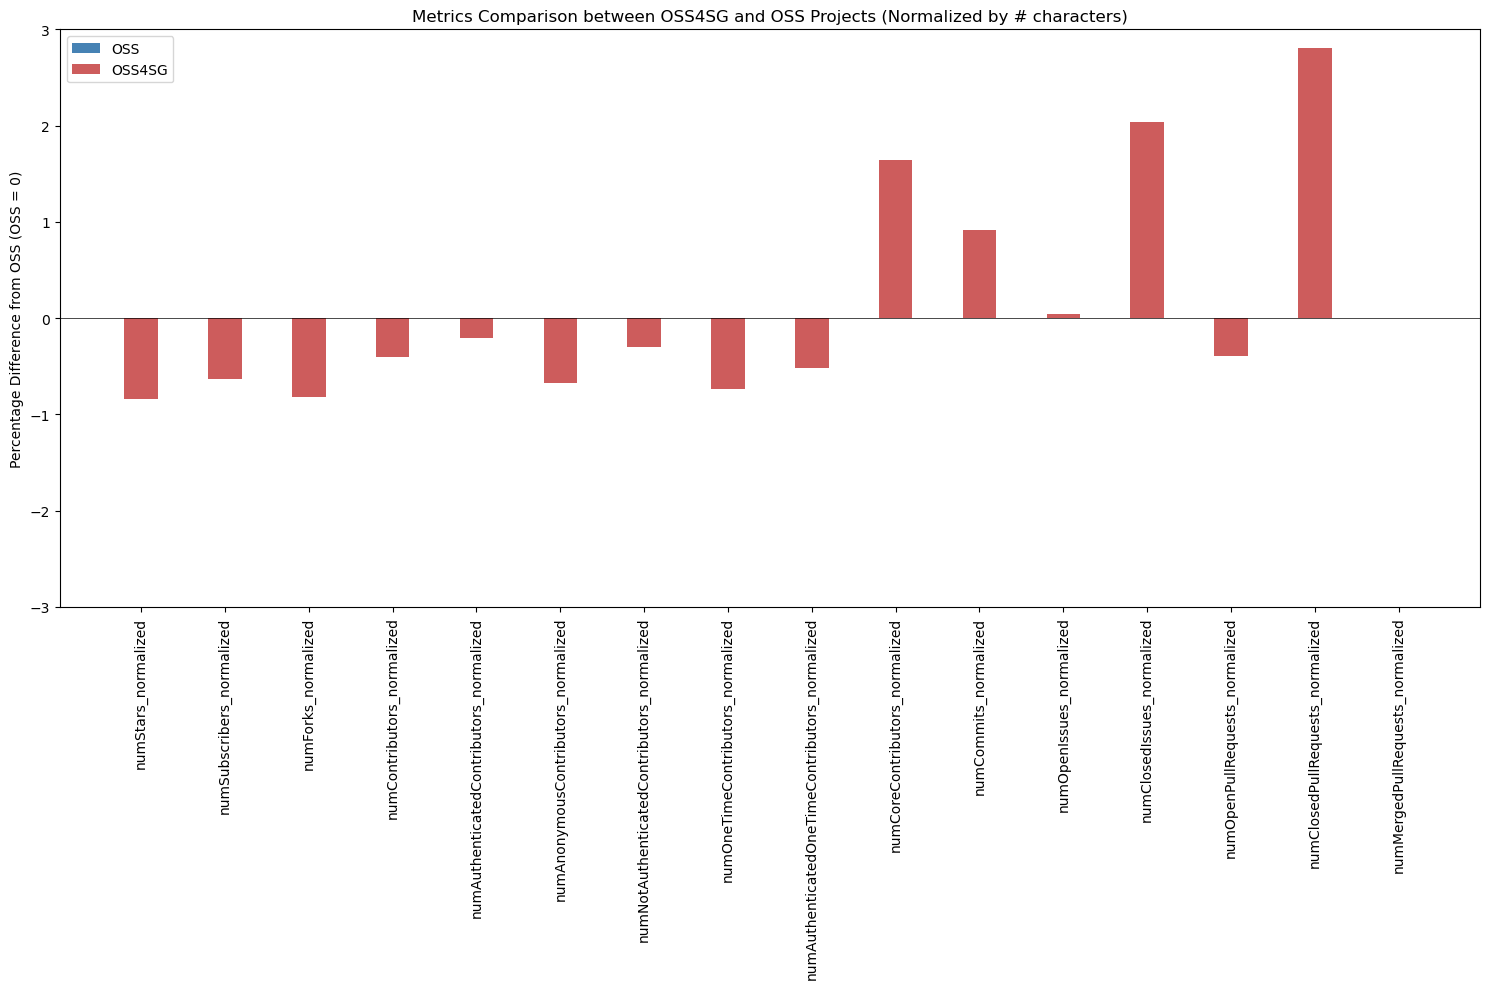

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the normalized datasets
oss4sg_df_normalized = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS4SG-Project-Info_normalized.csv')
oss_df_normalized = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS-Project-Info_normalized.csv')

# Add 'ProjectType' column
oss4sg_df_normalized['ProjectType'] = 'OSS4SG'
oss_df_normalized['ProjectType'] = 'OSS'

# Combine datasets
combined_df = pd.concat([oss4sg_df_normalized, oss_df_normalized], ignore_index=True)
combined_df.reset_index(drop=True, inplace=True)

# Calculate averages
metrics = ['numStars_normalized', 'numSubscribers_normalized', 'numForks_normalized', 'numContributors_normalized',
           'numAuthenticatedContributors_normalized', 'numAnonymousContributors_normalized',
           'numNotAuthenticatedContributors_normalized', 'numOneTimeContributors_normalized',
           'numAuthenticatedOneTimeContributors_normalized', 'numCoreContributors_normalized',
           'numCommits_normalized', 'numOpenIssues_normalized', 'numClosedIssues_normalized',
           'numOpenPullRequests_normalized', 'numClosedPullRequests_normalized', 'numMergedPullRequests_normalized']

avg_metrics = combined_df.groupby('ProjectType')[metrics].mean()

# Create summary table
summary_table = pd.DataFrame(avg_metrics.transpose())

# Calculate ratios (OSS4SG / OSS)
oss_values = summary_table['OSS']
oss4sg_values = summary_table['OSS4SG']
ratio_values = oss4sg_values / oss_values

# Adjust ratios by subtracting 1 to show percentage difference
adjusted_values = ratio_values - 1

# Prepare data for plotting
metrics_list = summary_table.index.tolist()
x = np.arange(len(metrics_list))
width = 0.4  # Width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Plot OSS bars at 0 (no height)
ax.bar(x, np.zeros_like(oss_values), width, label='OSS', color='steelblue')

# Plot OSS4SG bars as percentage differences
ax.bar(x, adjusted_values, width, label='OSS4SG', color='indianred')

# Configure plot
ax.set_xticks(x)
ax.set_xticklabels(metrics_list, rotation=90)
ax.axhline(0, color='black', linewidth=0.5)
ax.set_ylim(-3, 3)
ax.set_ylabel('Percentage Difference from OSS (OSS = 0)')
ax.set_title('Metrics Comparison between OSS4SG and OSS Projects (Normalized by # characters)')
ax.legend()

plt.tight_layout()
plt.show()


In [14]:
!pip install ace_tools

In [16]:
import pandas as pd

# Load the original datasets (before normalization)
oss4sg_df = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS4SG-Project-Info_LOC_readme_only.csv')
oss_df = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS-Project-Info_LOC_readme_only.csv')

# Load the normalized datasets (after normalization)
oss4sg_df_normalized = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS4SG-Project-Info_normalized.csv')
oss_df_normalized = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS-Project-Info_normalized.csv')

# Metrics to calculate averages for
metrics = ['numStars', 'numSubscribers', 'numForks', 'numContributors', 'numAuthenticatedContributors',
           'numAnonymousContributors', 'numNotAuthenticatedContributors', 'numOneTimeContributors',
           'numAuthenticatedOneTimeContributors', 'numCoreContributors', 'numCommits', 'numOpenIssues',
           'numClosedIssues', 'numOpenPullRequests', 'numClosedPullRequests', 'numMergedPullRequests']

# Combine the original datasets for OSS and OSS4SG
combined_original = pd.concat([oss4sg_df[metrics], oss_df[metrics]], ignore_index=True)

# Combine the normalized datasets for OSS and OSS4SG
combined_normalized = pd.concat([oss4sg_df_normalized[[col + '_normalized' for col in metrics]],
                                 oss_df_normalized[[col + '_normalized' for col in metrics]]], ignore_index=True)

# Apply Min-Max normalization (scaled to 0-10) for both original and normalized metrics
def min_max_scale(df):
    return 10 * (df - df.min()) / (df.max() - df.min())

scaled_original = min_max_scale(combined_original)
scaled_normalized = min_max_scale(combined_normalized)

# Recalculate the average values after scaling
scaled_original_oss4sg = scaled_original.iloc[:len(oss4sg_df)].mean()
scaled_original_oss = scaled_original.iloc[len(oss4sg_df):].mean()

scaled_normalized_oss4sg = scaled_normalized.iloc[:len(oss4sg_df_normalized)].mean()
scaled_normalized_oss = scaled_normalized.iloc[len(oss4sg_df_normalized):].mean()

# Create a combined table for before and after normalization, with scaling applied
averages_combined_scaled = pd.DataFrame({
    'Metric': metrics,
    'Scaled Original OSS4SG': scaled_original_oss4sg.values,
    'Scaled Original OSS': scaled_original_oss.values,
    'Scaled Normalized OSS4SG': scaled_normalized_oss4sg.values,
    'Scaled Normalized OSS': scaled_normalized_oss.values
})

# Display the combined scaled table
averages_combined_scaled


,Metric,Scaled Original OSS4SG,Scaled Original OSS,Scaled Normalized OSS4SG,Scaled Normalized OSS
0,numStars,0.024945,0.416804,0.036973,0.225445
1,numSubscribers,0.052523,0.419248,0.058428,0.161318
2,numForks,0.077106,0.468559,0.038788,0.221007
3,numContributors,0.343155,0.839021,0.060508,0.101513
4,numAuthenticatedContributors,1.494949,3.385365,0.060522,0.076081
5,numAnonymousContributors,0.159933,0.429461,0.052407,0.159018
6,numNotAuthenticatedContributors,0.931809,1.606145,0.059206,0.084745
7,numOneTimeContributors,0.202880,0.759619,0.052508,0.200781
8,numAuthenticatedOneTimeContributors,0.638874,2.175758,0.060808,0.126648
9,numCoreContributors,4.804293,3.667582,0.064055,0.024229


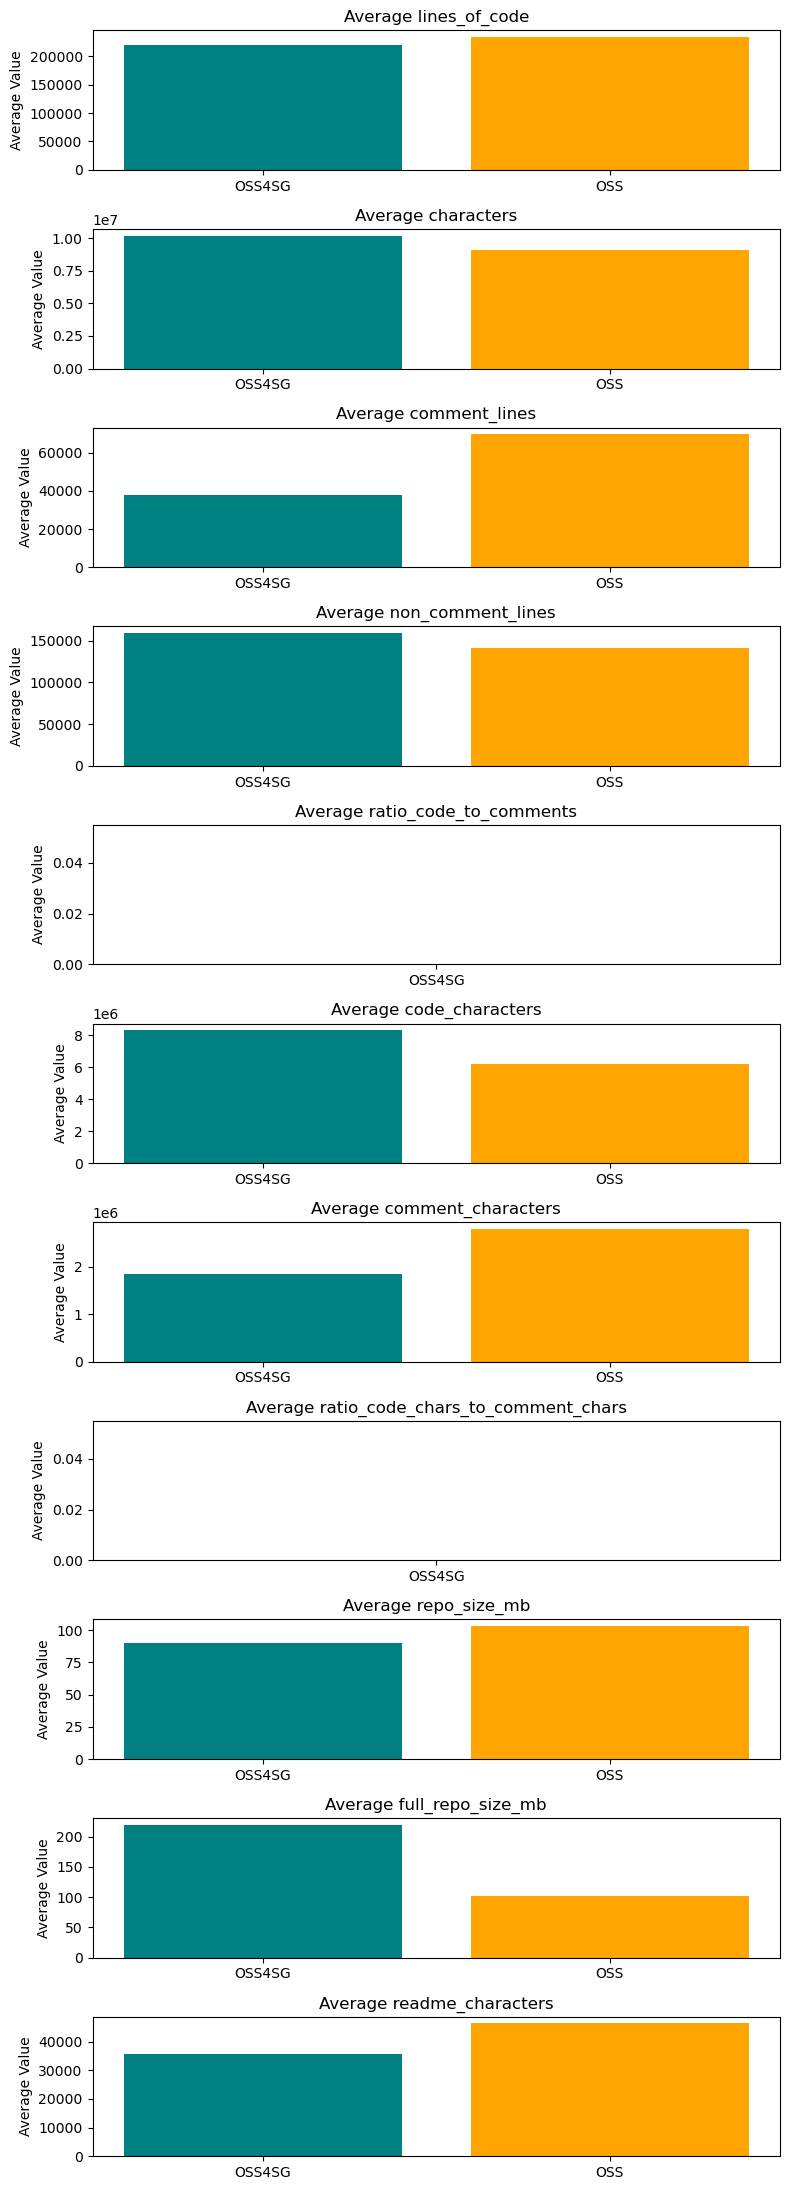

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the OSS4SG dataset
oss4sg_df = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS4SG-Project-Info_LOC_readme_only.csv')
# Load the OSS dataset
oss_df = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS-Project-Info_LOC_readme_only.csv')

# Columns to analyze
metrics = ['lines_of_code', 'characters', 'comment_lines', 'non_comment_lines', 'ratio_code_to_comments',
           'code_characters', 'comment_characters', 'ratio_code_chars_to_comment_chars', 'repo_size_mb',
           'full_repo_size_mb', 'readme_characters']

# Convert all relevant columns to numeric, errors='coerce' will turn non-numeric values into NaN
oss4sg_df[metrics] = oss4sg_df[metrics].apply(pd.to_numeric, errors='coerce')
oss_df[metrics] = oss_df[metrics].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in any of the metrics
oss4sg_df_clean = oss4sg_df.dropna(subset=metrics)
oss_df_clean = oss_df.dropna(subset=metrics)

# Calculate the average for each metric
avg_oss4sg = oss4sg_df_clean[metrics].mean()
avg_oss = oss_df_clean[metrics].mean()

# Create subplots to show all metrics in separate graphs
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(8, 2 * len(metrics)))

for i, metric in enumerate(metrics):
    ax = axes[i]
    
    # Check for valid averages
    if not pd.isnull(avg_oss4sg[metric]) and not pd.isnull(avg_oss[metric]):
        # Bar chart for both OSS4SG and OSS
        ax.bar(['OSS4SG', 'OSS'], [avg_oss4sg[metric], avg_oss[metric]], color=['teal', 'orange'])
        ax.set_title(f'Average {metric}')
        ax.set_ylabel('Average Value')
    else:
        ax.set_title(f'No Data for {metric}')
    
    # Adjust limits for better visibility
    ax.set_ylim(bottom=0)  # Ensure the bottom of the graph is 0 for all charts

plt.tight_layout()
plt.show()


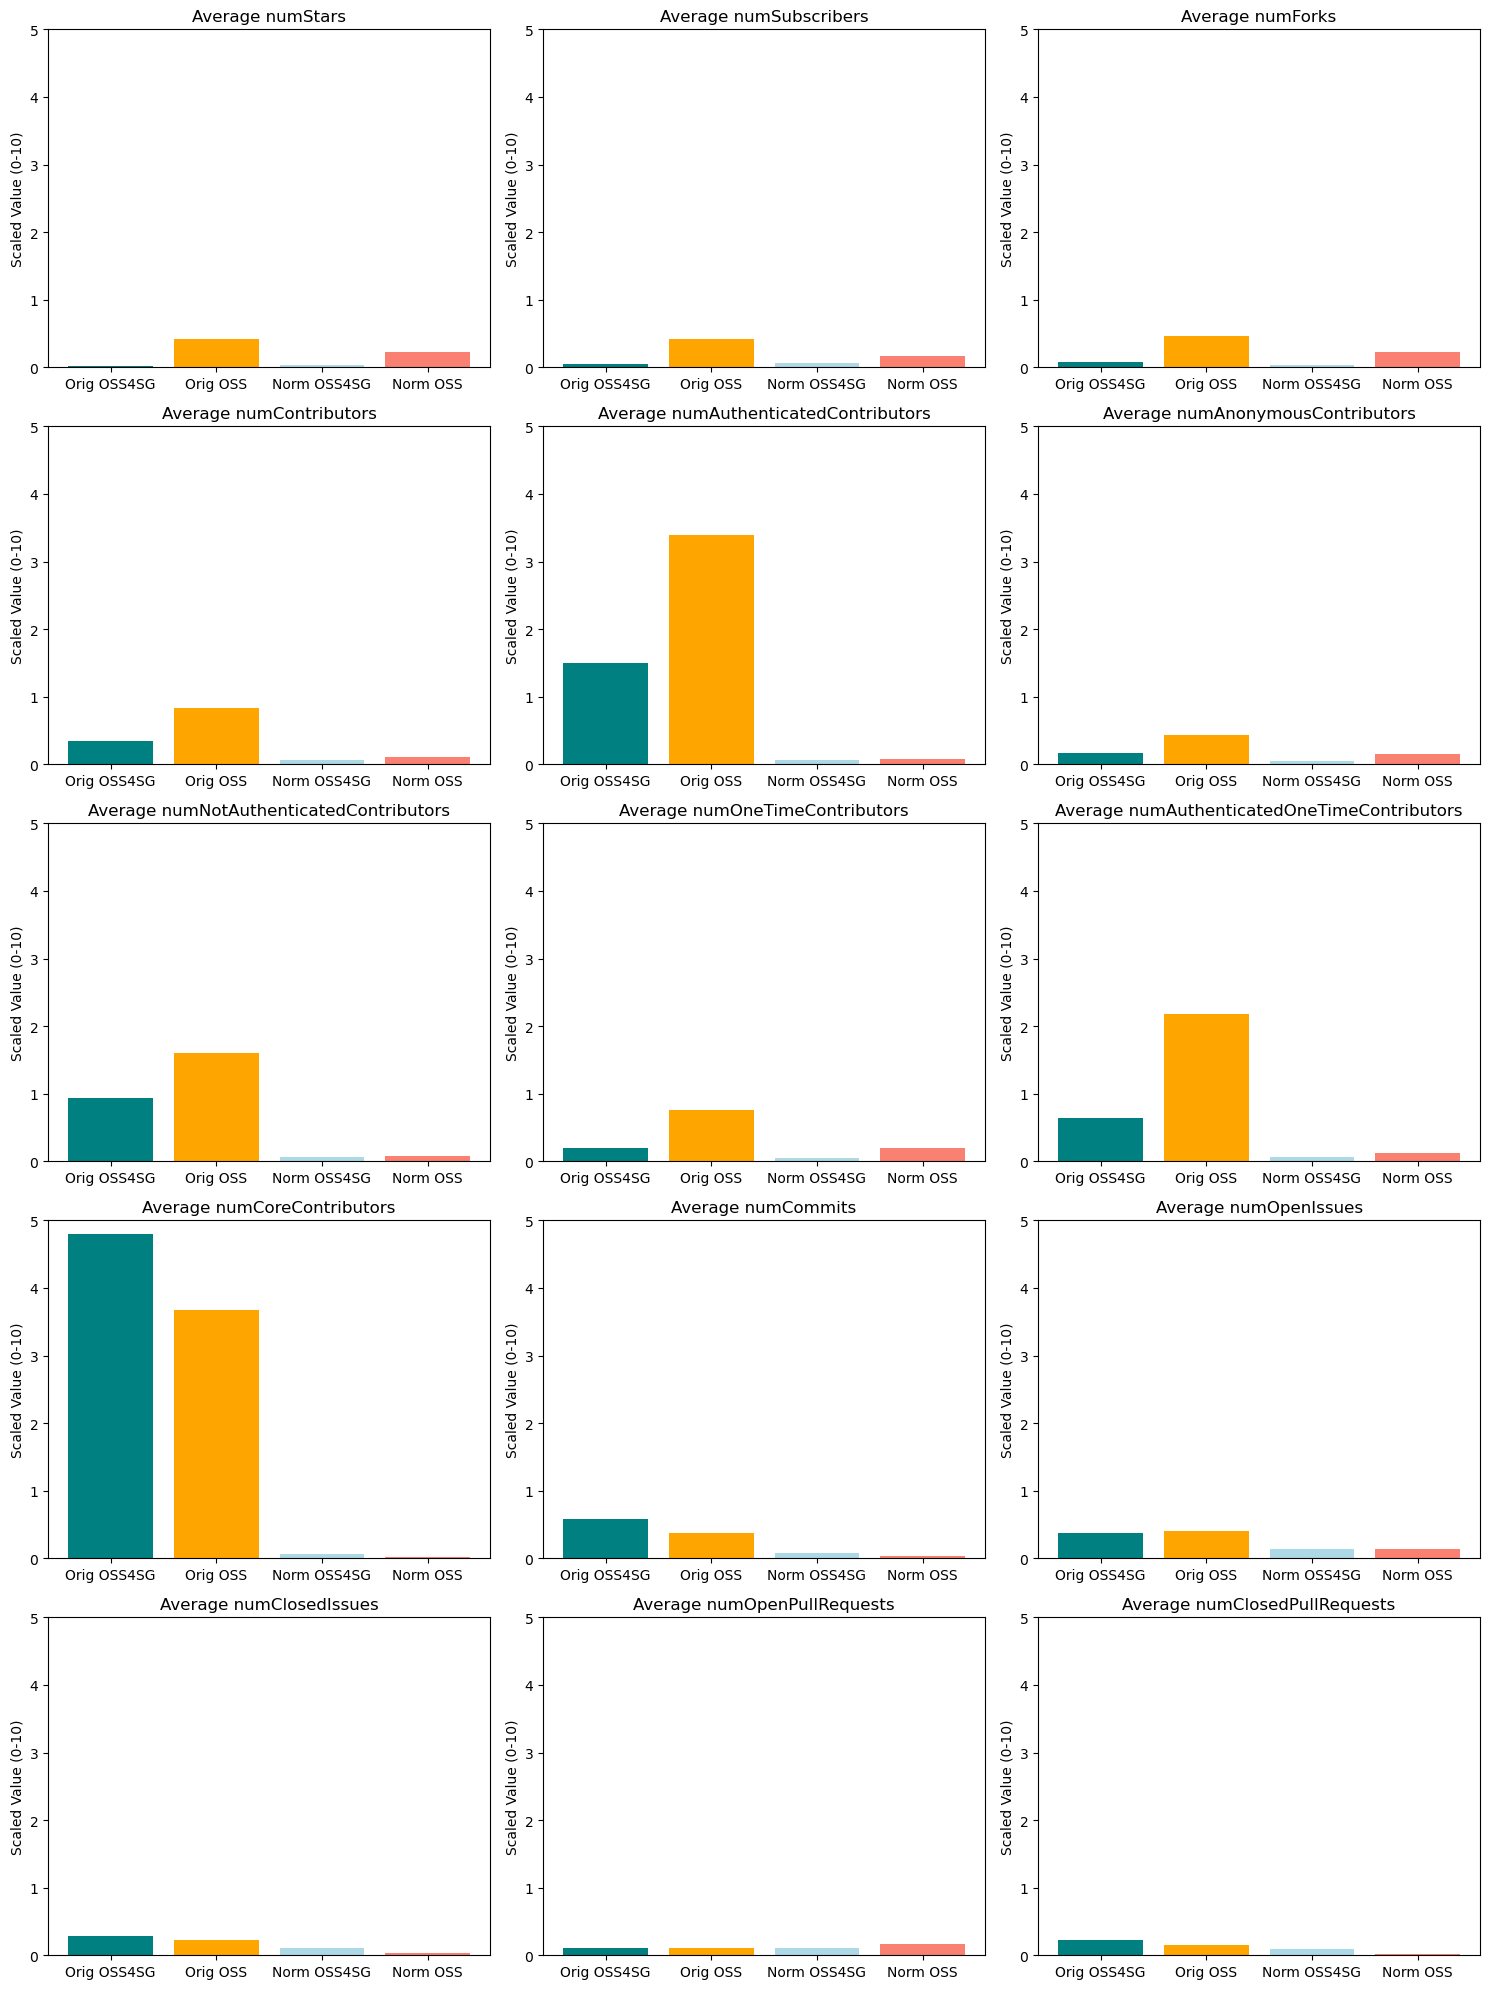

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the original datasets (before normalization)
oss4sg_df = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS4SG-Project-Info_LOC_readme_only.csv')
oss_df = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS-Project-Info_LOC_readme_only.csv')

# Load the normalized datasets (after normalization)
oss4sg_df_normalized = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS4SG-Project-Info_normalized.csv')
oss_df_normalized = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS-Project-Info_normalized.csv')

# Metrics to calculate averages for
metrics = ['numStars', 'numSubscribers', 'numForks', 'numContributors', 'numAuthenticatedContributors',
           'numAnonymousContributors', 'numNotAuthenticatedContributors', 'numOneTimeContributors',
           'numAuthenticatedOneTimeContributors', 'numCoreContributors', 'numCommits', 'numOpenIssues',
           'numClosedIssues', 'numOpenPullRequests', 'numClosedPullRequests', 'numMergedPullRequests']

# Combine the original datasets for OSS and OSS4SG
combined_original = pd.concat([oss4sg_df[metrics], oss_df[metrics]], ignore_index=True)

# Combine the normalized datasets for OSS and OSS4SG
combined_normalized = pd.concat([oss4sg_df_normalized[[col + '_normalized' for col in metrics]],
                                 oss_df_normalized[[col + '_normalized' for col in metrics]]], ignore_index=True)

# Apply Min-Max normalization (scaled to 0-10) for both original and normalized metrics
def min_max_scale(df):
    return 10 * (df - df.min()) / (df.max() - df.min())

scaled_original = min_max_scale(combined_original)
scaled_normalized = min_max_scale(combined_normalized)

# Recalculate the average values after scaling
scaled_original_oss4sg = scaled_original.iloc[:len(oss4sg_df)].mean()
scaled_original_oss = scaled_original.iloc[len(oss4sg_df):].mean()

scaled_normalized_oss4sg = scaled_normalized.iloc[:len(oss4sg_df_normalized)].mean()
scaled_normalized_oss = scaled_normalized.iloc[len(oss4sg_df_normalized):].mean()

# Create a combined table for before and after normalization, with scaling applied
averages_combined_scaled = pd.DataFrame({
    'Metric': metrics,
    'Scaled Original OSS4SG': scaled_original_oss4sg.values,
    'Scaled Original OSS': scaled_original_oss.values,
    'Scaled Normalized OSS4SG': scaled_normalized_oss4sg.values,
    'Scaled Normalized OSS': scaled_normalized_oss.values
})

# Plot the results as grouped bar charts for easy comparison
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()

# Ensure we do not exceed available subplots
for i, metric in enumerate(metrics[:len(axes)]):
    ax = axes[i]
    
    # Plot bars for the four groups: Original OSS4SG, Original OSS, Normalized OSS4SG, and Normalized OSS
    ax.bar(['Orig OSS4SG', 'Orig OSS', 'Norm OSS4SG', 'Norm OSS'],
           [averages_combined_scaled.iloc[i, 1], averages_combined_scaled.iloc[i, 2],
            averages_combined_scaled.iloc[i, 3], averages_combined_scaled.iloc[i, 4]],
           color=['teal', 'orange', 'lightblue', 'salmon'])
    
    ax.set_title(f'Average {metric}')
    ax.set_ylabel('Scaled Value (0-10)')
    ax.set_ylim([0, 5])

# Hide any unused subplots
for j in range(len(metrics), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [29]:
import pandas as pd

# Load the data
join_leave_rate_df = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/GraphInfo/Join Rate vs Leave Rate for all stages.csv')
oss4sg_df = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS4SG-Project-Info_LOC_readme_only.csv')
oss_df = pd.read_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/Filtered-OSS-Project-Info_LOC_readme_only.csv')

# Initialize a list to store the characters for each repo
characters_list = []

# Loop through each repo in the join_leave_rate_df
for index, row in join_leave_rate_df.iterrows():
    repo_name = row['Repo']
    is_sg = row['SG']
    
    # Find the corresponding characters value
    if is_sg == 1:
        # Search in oss4sg_df
        match = oss4sg_df[oss4sg_df['name'].str.contains(repo_name, regex=False, na=False)]
    else:
        # Search in oss_df
        match = oss_df[oss_df['name'].str.contains(repo_name, regex=False, na=False)]
    
    if not match.empty:
        # Get the 'characters' value if a match is found
        characters_value = match['characters'].values[0]
    else:
        # Handle case when no match is found
        characters_value = None
    
    # Append the characters value to the list
    characters_list.append(characters_value)

# Add the new column to the dataframe
join_leave_rate_df['characters_LOC'] = characters_list

# Save the new dataframe to a CSV file
join_leave_rate_df.to_csv('/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/GraphInfo/Join_Rate_vs_Leave_Rate_with_LOC.csv', index=False)

print("New file with characters_LOC column created successfully.")


New file with characters_LOC column created successfully.


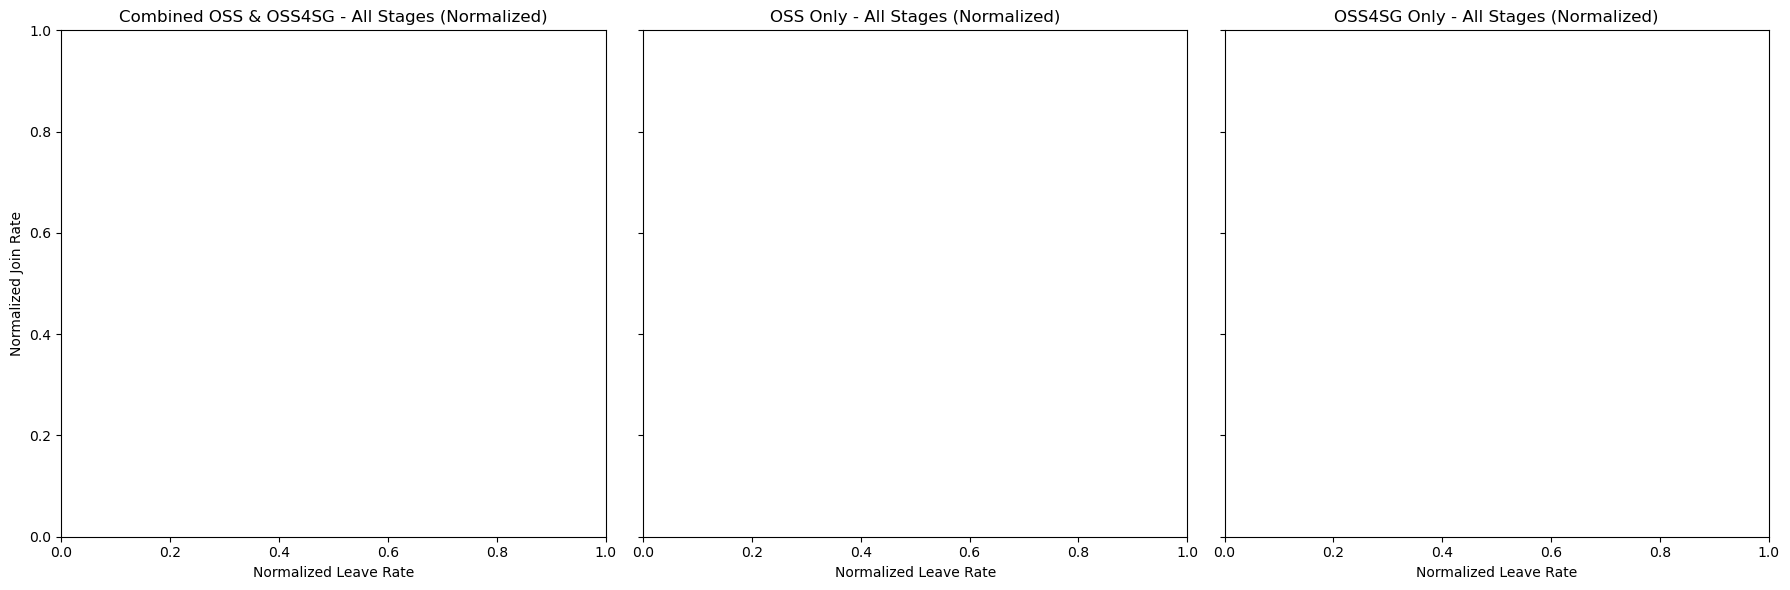

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler

# Load the combined dataset with the 'characters_LOC' column
file_path = '/Users/mohamadashraf/Desktop/Projects/OSS4SG_Classification-main/Datasets/GraphInfo/Join_Rate_vs_Leave_Rate_with_LOC.csv'
df_all = pd.read_csv(file_path)

# Initialize the scaler
scaler_oss = MinMaxScaler()
scaler_oss4sg = MinMaxScaler()

# Separate the data for SG=0 (OSS) and SG=1 (OSS4SG)
df_oss = df_all[df_all['SG'] == 0].copy()
df_oss4sg = df_all[df_all['SG'] == 1].copy()

# Normalize the join and leave rates separately for SG=0 and SG=1
df_oss[['Average Join Rate', 'Average Leave Rate', 'characters_LOC']] = scaler_oss.fit_transform(
    df_oss[['Average Join Rate', 'Average Leave Rate', 'characters_LOC']]
)

df_oss4sg[['Average Join Rate', 'Average Leave Rate', 'characters_LOC']] = scaler_oss4sg.fit_transform(
    df_oss4sg[['Average Join Rate', 'Average Leave Rate', 'characters_LOC']]
)

# Now normalize the join and leave rates by characters_LOC for both groups
df_oss['Normalized Join Rate'] = df_oss['Average Join Rate'] / df_oss['characters_LOC']
df_oss['Normalized Leave Rate'] = df_oss['Average Leave Rate'] / df_oss['characters_LOC']

df_oss4sg['Normalized Join Rate'] = df_oss4sg['Average Join Rate'] / df_oss4sg['characters_LOC']
df_oss4sg['Normalized Leave Rate'] = df_oss4sg['Average Leave Rate'] / df_oss4sg['characters_LOC']

# Combine the data back together
df_all_normalized = pd.concat([df_oss, df_oss4sg])

# Define the directories for saving the plot
output_dir = '/Users/mohamadashraf/Desktop/Projects/Graphs/printed graphs/'

# Create subplots for the graphs
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot combined data (OSS & OSS4SG) without fill or color
sns.kdeplot(
    data=df_all_normalized,
    x='Normalized Leave Rate',
    y='Normalized Join Rate',
    ax=axs[0],
    zorder=2  # Ensure KDE is drawn above shading
)
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)
axs[0].set_title('Combined OSS & OSS4SG - All Stages (Normalized)')
axs[0].set_xlabel('Normalized Leave Rate')
axs[0].set_ylabel('Normalized Join Rate')

# Plot OSS only (SG=0) without fill or color
sns.kdeplot(
    data=df_all_normalized[df_all_normalized['SG'] == 0],
    x='Normalized Leave Rate',
    y='Normalized Join Rate',
    ax=axs[1],
    zorder=2  # Ensure KDE is drawn above shading
)
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)
axs[1].set_title('OSS Only - All Stages (Normalized)')
axs[1].set_xlabel('Normalized Leave Rate')

# Plot OSS4SG only (SG=1) without fill or color
sns.kdeplot(
    data=df_all_normalized[df_all_normalized['SG'] == 1],
    x='Normalized Leave Rate',
    y='Normalized Join Rate',
    ax=axs[2],
    zorder=2  # Ensure KDE is drawn above shading
)
axs[2].set_xlim(0, 1)
axs[2].set_ylim(0, 1)
axs[2].set_title('OSS4SG Only - All Stages (Normalized)')
axs[2].set_xlabel('Normalized Leave Rate')

plt.tight_layout()

# Save the plot as a high-resolution PDF
output_file = os.path.join(output_dir, 'kde_plots_normalized_no_fill_per_group.pdf')
plt.savefig(output_file, format='pdf', dpi=300)

plt.show()
